In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [26]:
segments_df = pd.read_csv("../../data/Raw-GPS-data-Kandy-Buses/MAIN/OUTPUTS/merged_segements_10T.csv")

In [27]:
segments_df = segments_df.dropna()

In [28]:
segments_df[segments_df.isnull().any(axis=1)]

,segment_starting_time,segment_ending_time,trip_id,deviceid,date,start_terminal,end_terminal,direction,day_of_week,hour_of_day,...,max_speed,speed_variation,elevation_p,elevation_n,ele_X_speed_acc_p,ele_X_speed_acc_n,average_acceleration,average_deacceleration,std_acc_dacc,stop_count


In [29]:
selected_features = ['std_acc_dacc', 'speed_variation', 'elevation_n', 'ele_X_speed_acc_p', 'ele_X_speed_acc_n', 'average_acceleration', 'average_deacceleration','stop_count',	'average_speed', 'max_speed']
features = segments_df[selected_features]
features = features.values

In [30]:
# normalize the values
scaler = StandardScaler()

features = scaler.fit_transform(features)

In [31]:
# Apply PCA
num_components = 2 
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(features)

In [33]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.38890043 0.1998881 ]


In [34]:

# Fit Gaussian Mixture Model
n_components = 3  # Number of clusters/components
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X_pca)

# Predict cluster labels
labels = gmm.predict(X_pca)

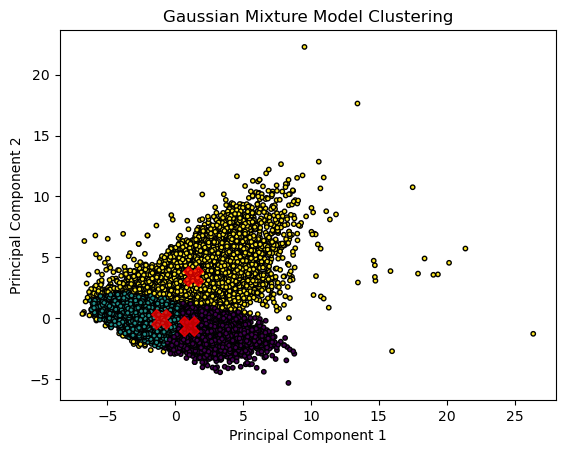

In [35]:
# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=40, edgecolors='k', marker='.')

# Plot the means of the Gaussian components
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title('Gaussian Mixture Model Clustering')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [37]:

original_features = np.random.rand(100, 5)  # Replace with your original features
pc1 = X_pca[:,0]
pc2 = X_pca[:,1]

# Combine data into a DataFrame
data = pd.DataFrame(np.column_stack([features, pc1, pc2]), columns=selected_features+ ['PC1', 'PC2'])

# Calculate correlations
correlations_pc1 = data.corr()['PC1'][:-2]  # Exclude PC1 and PC2 from the result
correlations_pc2 = data.corr()['PC2'][:-2]  # Exclude PC1 and PC2 from the result

# Combine correlations into a table
correlation_table = pd.DataFrame({
    'Original Feature': correlations_pc1.index,
    'Correlation with PC1': correlations_pc1.values,
    'Correlation with PC2': correlations_pc2.values
})

# Print or display the correlation table
print(correlation_table)


         Original Feature  Correlation with PC1  Correlation with PC2
0            std_acc_dacc              0.805354             -0.012272
1         speed_variation              0.787371             -0.492047
2             elevation_n              0.068030             -0.487125
3       ele_X_speed_acc_p              0.398725              0.748448
4       ele_X_speed_acc_n              0.417966              0.759547
5    average_acceleration              0.710455              0.344415
6  average_deacceleration             -0.769779              0.064156
7              stop_count              0.317866              0.245571
8           average_speed              0.653582             -0.331565
9               max_speed              0.810330             -0.298773


In [38]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = X_pca
y = labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


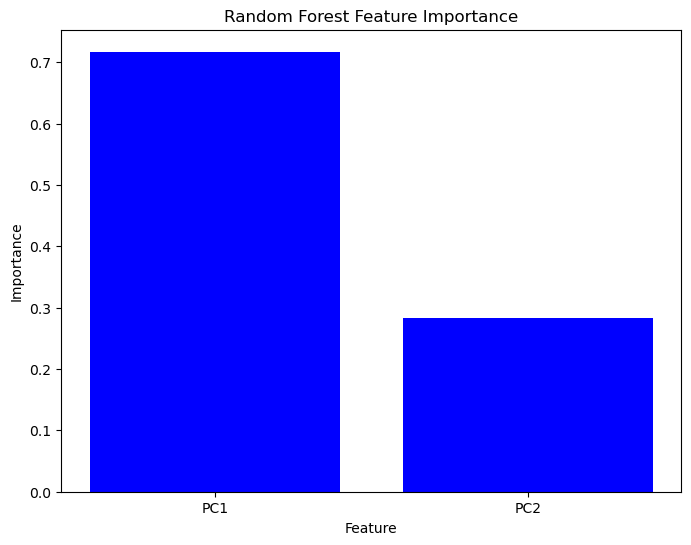

In [39]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar( ['PC1','PC2'], feature_importances, color='blue')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()